In [1]:
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv('HTRU_2.csv', header=None)

In [8]:
df.head()

,0,1,2,3,4,5,6,7,8
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [15]:
df_group=df.groupby([8]).mean()

In [16]:
df_group

,0,1,2,3,4,5,6,7
8,,,,,,,,
0,116.562726,47.339741,0.210440,0.380844,8.863258,23.287984,8.862674,113.620344
1,56.690608,38.710598,3.130655,15.553576,49.825995,56.468963,2.757069,17.931728


In [50]:
#-------------Types of pulsers in the skies

#using Agglomerative clustering
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree #to plot graphwe need to import this with sklearn
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
from sklearn.preprocessing import StandardScaler 
scale=StandardScaler()
data_cluster_scaled=scale.fit_transform(df)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [52]:
data_cluster_scaled

array([[ 1.14931702,  1.33483164, -0.66956953, ..., -0.07279778,
        -0.28743812, -0.31749915],
       [-0.3341682 ,  1.80226533, -0.01178476, ...,  0.50442694,
         0.21158145, -0.31749915],
       [-0.31437216, -1.05332222, -0.14523256, ..., -0.12599609,
        -0.39137346, -0.31749915],
       ...,
       [ 0.3218423 ,  1.95621968, -0.2993338 , ..., -1.28807874,
        -0.94133005, -0.31749915],
       [ 0.13362759,  1.07450972, -0.26005007, ...,  0.37825656,
         0.27584987, -0.31749915],
       [-2.10576204,  5.73546965,  0.87267394, ..., -2.19732744,
        -0.97105168, -0.31749915]])

In [53]:
z = linkage(y=data_cluster_scaled, method='complete')
z

array([[4.41600000e+03, 1.05110000e+04, 3.73695093e-02, 2.00000000e+00],
       [1.04110000e+04, 1.66700000e+04, 3.99588105e-02, 2.00000000e+00],
       [8.99000000e+02, 1.13680000e+04, 4.48041820e-02, 2.00000000e+00],
       ...,
       [3.57880000e+04, 3.57910000e+04, 1.45600657e+01, 1.70010000e+04],
       [3.57900000e+04, 3.57920000e+04, 1.80147440e+01, 1.75880000e+04],
       [3.57830000e+04, 3.57930000e+04, 2.11032759e+01, 1.78980000e+04]])

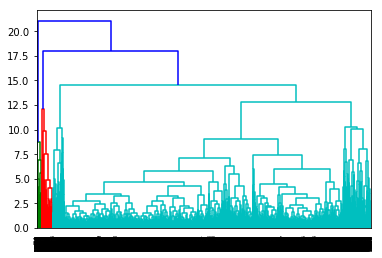

In [54]:
d=dendrogram(z)

In [55]:
c = cut_tree(z, height=11) #cutting tree at 11 will give 3 types of pulsers 

In [22]:
#--------------------Model

from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [43]:
#differentiating independent and dependent variables
X1 = df.loc[:,0:7]
y1=df.loc[:,8]

In [44]:
#using Random Forest classifier to clasify a pulsers
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf_param ={'n_estimators': [50,100], 'max_features':[3,5]}
best_rf = GridSearchCV(estimator=rf, param_grid = rf_param, cv=5, n_jobs=-1)

In [45]:
best_rf.fit(X=X1,y=y1)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [50, 100], 'max_features': [3, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [49]:
#performance of the model using cross validation
cross_val_score(estimator=best_rf.best_estimator_,X=X1,y=y1,cv=5,n_jobs=-1 ).mean() 

0.9788243799007592